# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Gradient Descent - exerscises

Task: **fix the gradient descent optimisation** for different data set. The steps of GD are the same. 


**Sub-tasks**:

1/ Improve the Gradient descent function: store history of loss. 

2/ Plot the loss against the epoches. 

3/ Store the history of w and b paramseters.  

4/ Plot w and b against the epochs  


In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_9704\1706525374.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data 

Use `data_gd.csv`,  fetature `f1` from the dataset. 


In [ ]:
# os.listdir()

In [2]:
# Adjust dir path as needed 
df = pd.read_csv('data_gd.csv', sep=',', header='infer')

In [3]:
x = df['f1']
y = df['y']

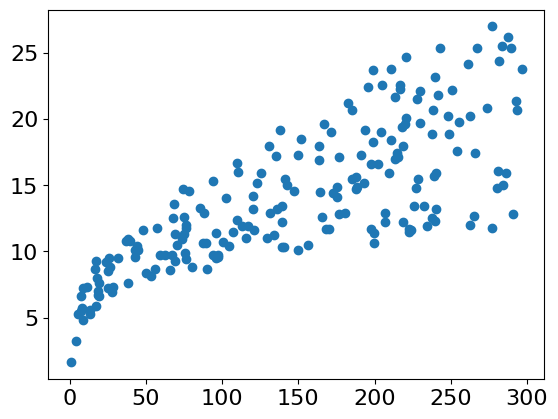

In [4]:
# Data plot 
plt.scatter(x, y)

### Task
Build a regression model to predict `y` based on other `x`values.

In [5]:
print("We have {} records to tranin the model.".format(x.size))

We have 200 records to tranin the model.


### Model: linear regression

 
$$ 
    f(x) = wx + b
$$ 

where `x` is a vector of input features;
`y` is a vector of outputs (targets), also response variable; 
`b` is the bias term (intercept), also often abbreviated as w0
`w` is the weight(s) (direction of the linear model) 

Find the optimal values of `w` and `b`!



In [6]:
# Prediction model
def model(x, w, b):
    """Linear model
    """
    
    return w*x + b  

### Loss function (MSE)

$$
    Loss = L = \frac{1}{N} \sum_{i=1}^{N}(y_i - (wx_i + b))^2 
$$ 

In [7]:
# Define the loss function 
def loss(x, y, w, b):
    """Loss function (MSE)  
    """
    N = len(x)

    # Initialize loss
    total_error = 0.0 
    for i in range(N):
        total_error += (y[i] - (w*x[i] + b))**2

    return total_error / N 


### Set parameters

In [36]:
# Learning rate (here alpha) 
alpha = 0.0000001 

# Number of epochs to iterate 
epochs = 15000

### Model weights initialisation

In [14]:
# Initialization
w = 0 
b = 0 

### Calcualte the gradinets


$$
\frac{\partial L}{\partial w}=\frac{1}{N} \sum_{i=1}^{N}(2\cdot(y_i - (wx_i + b))\cdot(-x_i);
$$ 

$$
\frac{\partial L}{\partial b}=\frac{1}{N} \sum_{i=1}^{N}(2\cdot(y_i - (wx_i + b))\cdot(-1);
$$ 



### Define update function

$$
    w \leftarrow w - \alpha\frac{\partial L}{\partial w}, 
$$

and 

$$
   b \leftarrow b - \alpha\frac{\partial L}{\partial b}. 
$$

In [15]:
# Define the update function

def update(x, y, w, b, alpha):
    """Update function, which returns updated parameters. 
    """
    dr_dw = 0.0
    dr_db = 0.0
    N = len(x)

    for i in range(N):
        dr_dw += -2 * x[i] * (y[i] - (w * x[i] + b))
        dr_db += -2 * (y[i] - (w * x[i] + b))

    # Update w and b
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    return w, b 

### Gradient descent function

The Gradien Descent function to iterate **over the epochs** where we recalculate partial derivatives using the above function, update `w`nand `b`; we **continue the process until convergence**. 

In [16]:
# Define the gradient function

def gradient_descent(x, y, w, b, alpha, epochs):
    """Gradient descent process. 
    """

    counter = 0;
    for e in range(epochs):
        w, b = update(x, y, w, b, alpha)

        # Log the progress
        if (e == 0) or (e < 3000 and e % 200 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print('---')
            # Plot the update 
            plt.figure(counter)
            axes = plt.gca()
            axes.set_xlim([0,300])
            axes.set_ylim([0,50])
            plt.scatter(x, y)
            X_plot = np.linspace(0,300,300)
            plt.plot(X_plot, X_plot*w + b, 'r-')
            counter += 1
    return w, b                

### Run the Gradient Descent procedure

epoch:  0 loss: 221.39861733385325
w, b:  0.0004821083399999999 2.8045000000000004e-06
---
epoch:  200 loss: 42.46836213634019
w, b:  0.057343528168063804 0.0003628072367775664
---
epoch:  400 loss: 24.940910884739992
w, b:  0.07513968773558545 0.0005244260244752371
---
epoch:  600 loss: 23.223769779228554
w, b:  0.08070925646005853 0.000623954383716927
---
epoch:  800 loss: 23.055337255475223
w, b:  0.08245216378310409 0.0007040492711094211
---
epoch:  1000 loss: 23.038609430440662
w, b:  0.08299740794329426 0.0007780614016323734
---
epoch:  1200 loss: 23.036741936370955
w, b:  0.08316780915435264 0.0008501692635042054
---
epoch:  1400 loss: 23.036330099726293
w, b:  0.08322089254283807 0.0009216806341633674
---
epoch:  1600 loss: 23.036060857531016
w, b:  0.08323725796483462 0.0009930048199794223
---
epoch:  1800 loss: 23.035805587900043
w, b:  0.08324213145124501 0.0010642699250958956
---
epoch:  2000 loss: 23.035551691598133
w, b:  0.08324340821015039 0.0011355160433745566
---
epoc

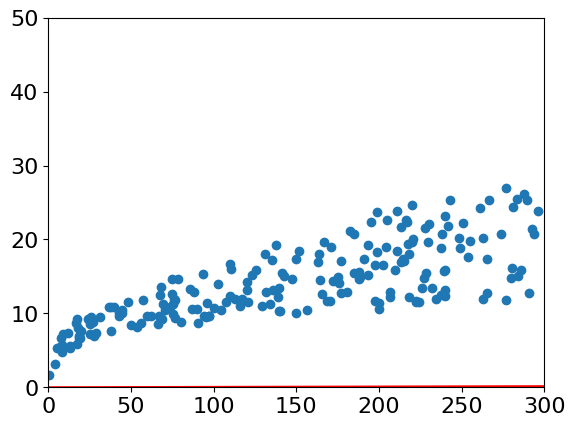

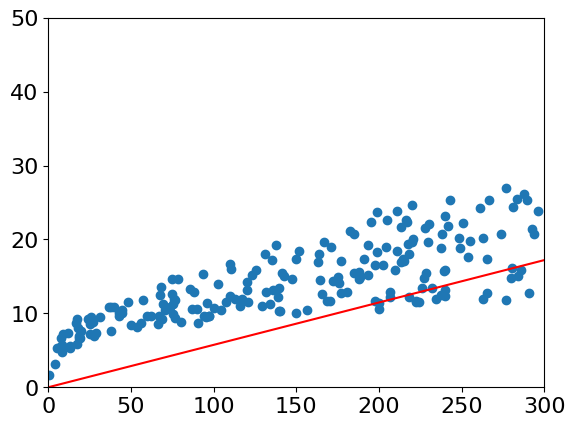

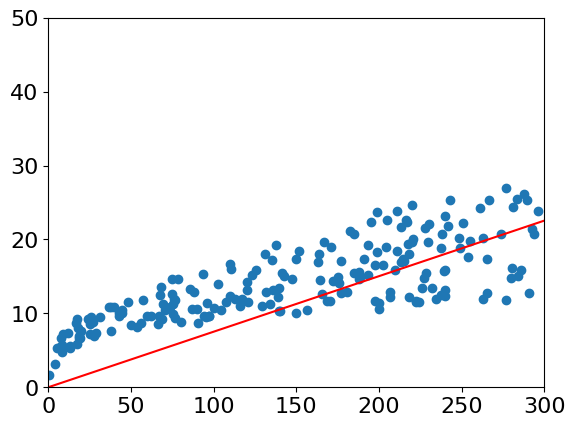

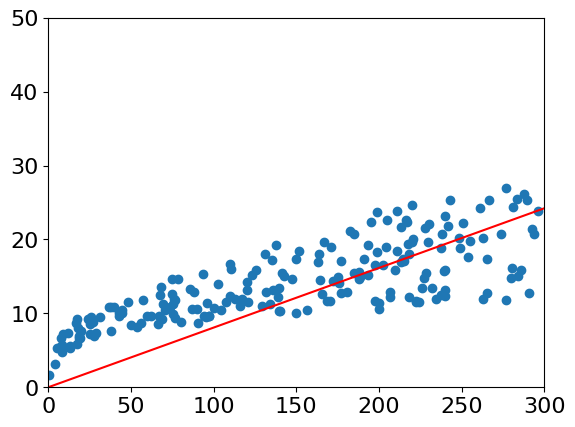

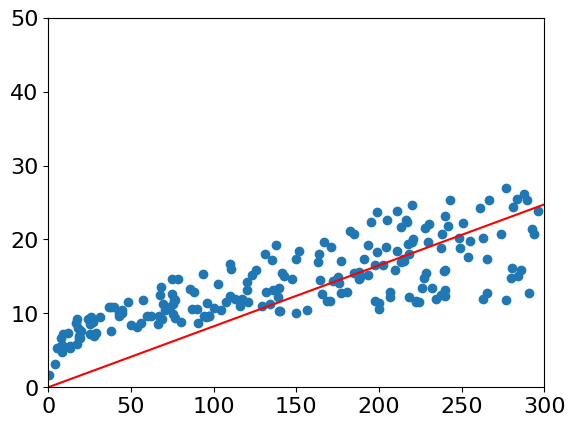

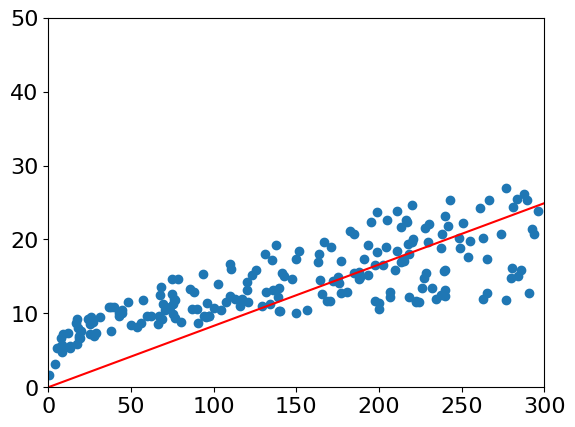

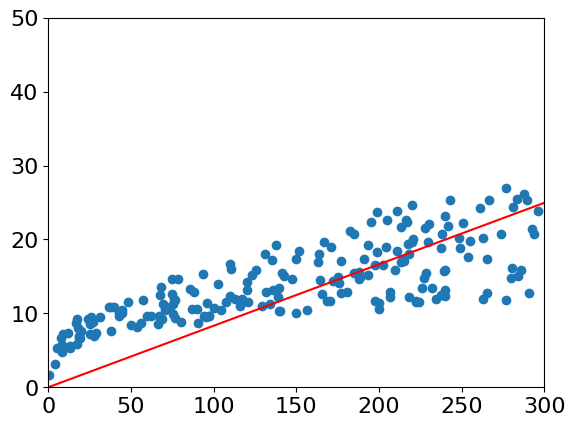

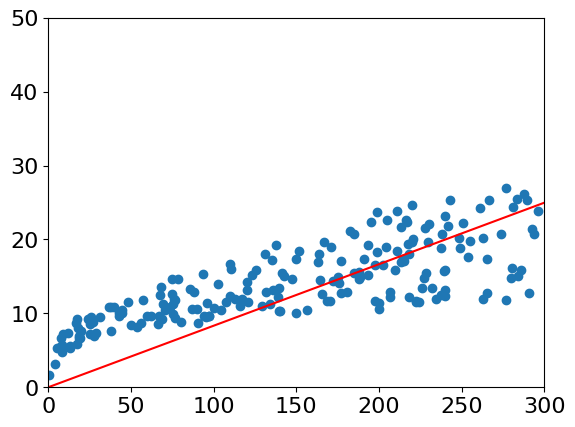

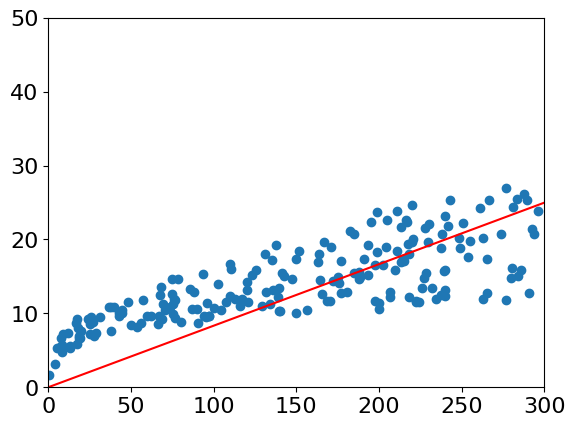

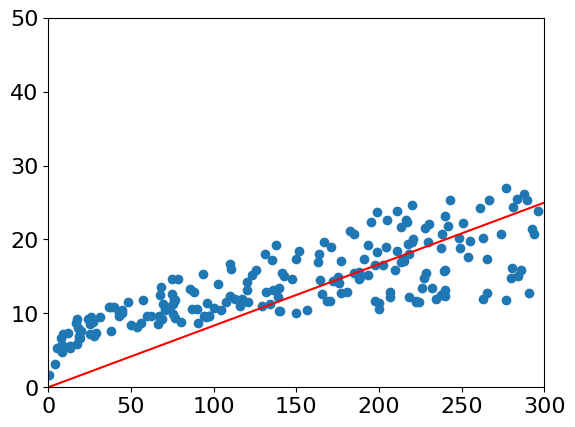

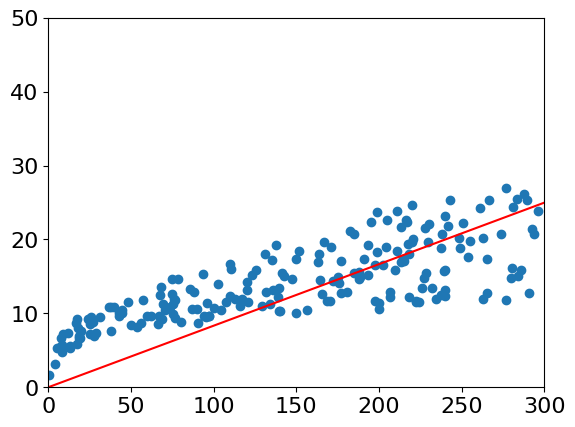

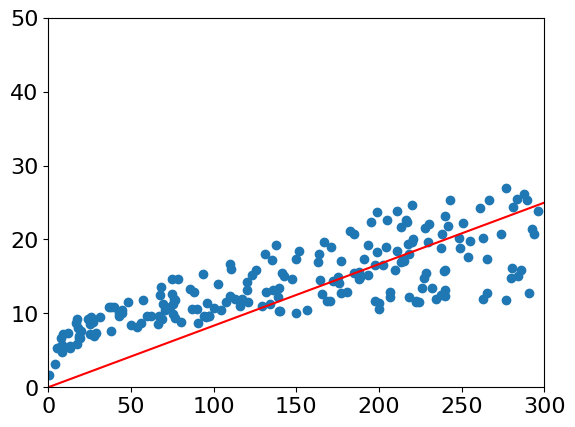

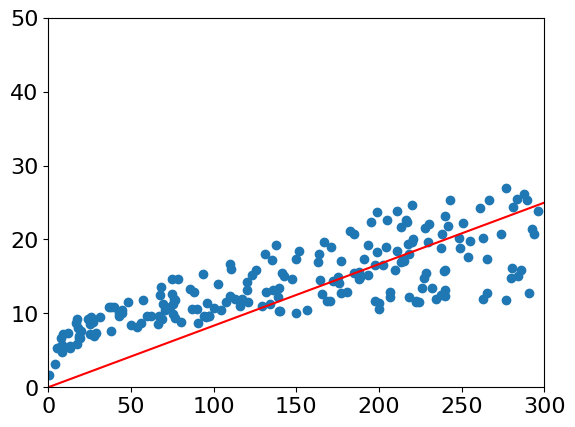

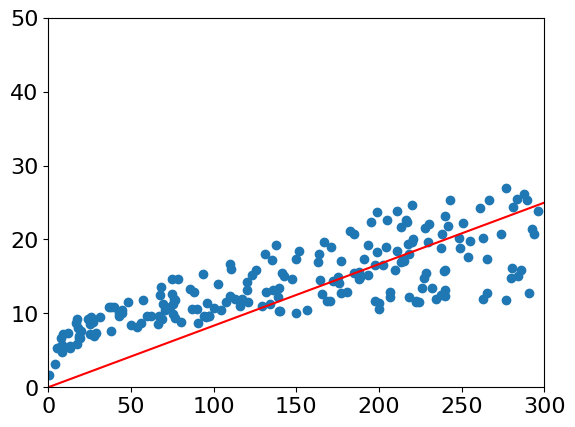

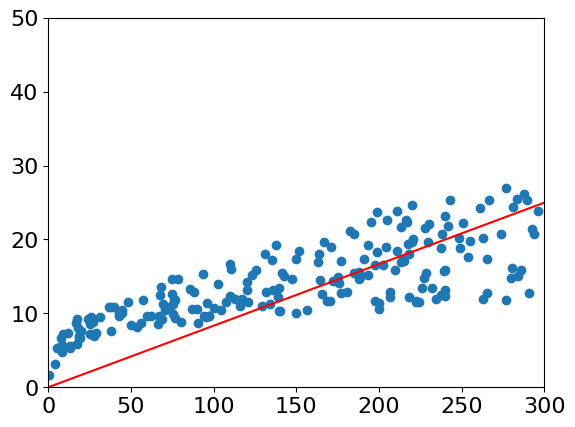

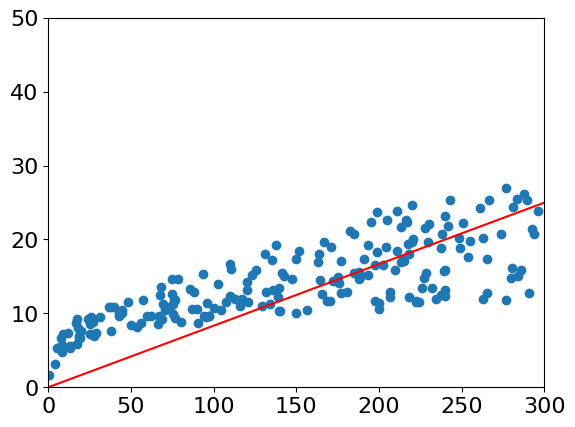

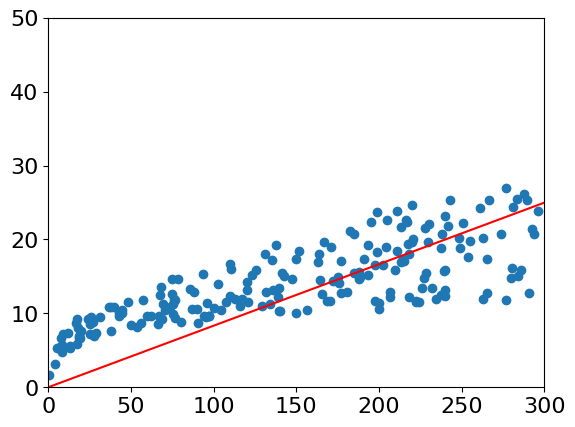

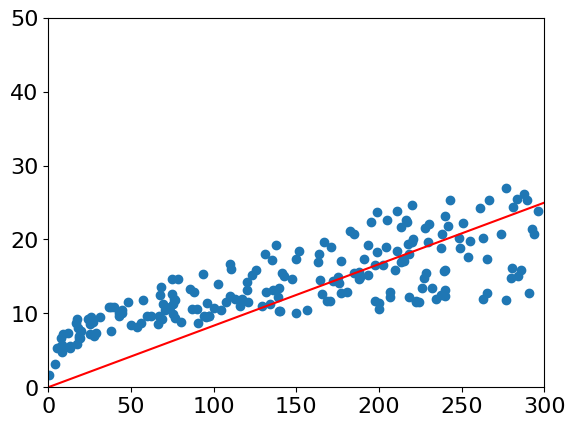

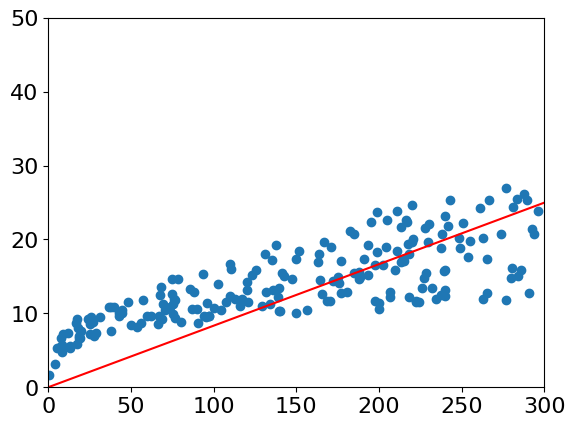

In [17]:
# Run the Gradient Descent algorithm
w, b = gradient_descent(x, y, w, b, alpha, epochs)
print('End of training!')

In [18]:
print(w, b)

0.0832206496952772 0.005764072951960976


#### What is the result of the optimisation procedure?

1/ Improve the Gradient descent function: store history of loss. 

2/ Plot the loss against the epoches. 

3/ Store the history of w and b paramseters.  

4/ Plot w and b against the epochos  

5/ Evaluate the plots 

### Task 1/ Improve the Gradient Descent function, store history of loss. 

epoch:  0 loss: 23.00007769284648
w, b:  0.08319354392490126 0.011101691403198615
---
epoch:  200 loss: 22.999824669045566
w, b:  0.08319318267784216 0.01117282750969182
---
epoch:  400 loss: 22.9995716503715
w, b:  0.08319282143444294 0.011243962895491223
---
epoch:  600 loss: 22.99931863682416
w, b:  0.08319246019470355 0.011315097560604127
---
epoch:  800 loss: 22.999065628403432
w, b:  0.08319209895862395 0.01138623150503781
---
epoch:  1000 loss: 22.998812625109263
w, b:  0.0831917377262041 0.011457364728799624
---
epoch:  1200 loss: 22.998559626941528
w, b:  0.08319137649744396 0.011528497231896839
---
epoch:  1400 loss: 22.99830663390008
w, b:  0.08319101527234352 0.011599629014336766
---
epoch:  1600 loss: 22.998053645984886
w, b:  0.08319065405090269 0.011670760076126696
---
epoch:  1800 loss: 22.99780066319579
w, b:  0.08319029283312149 0.011741890417273946
---
epoch:  2000 loss: 22.997547685532712
w, b:  0.08318993161899982 0.011813020037785794
---
epoch:  2200 loss: 22.9972

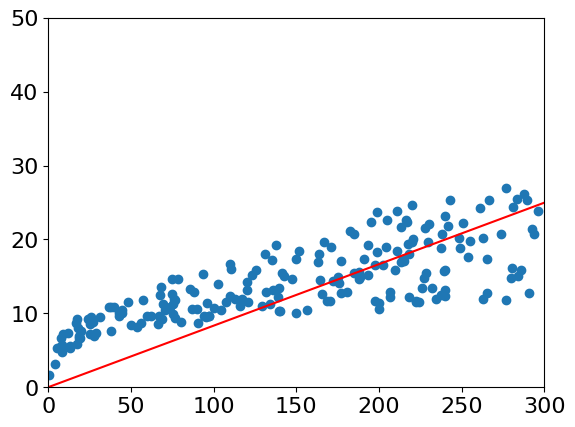

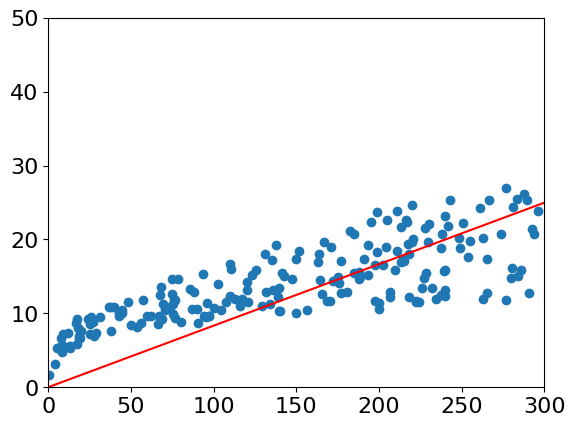

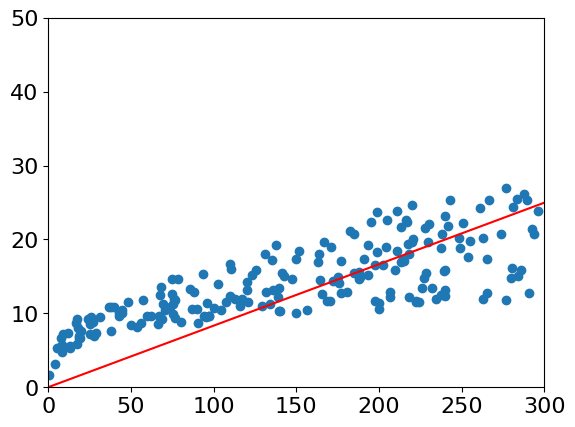

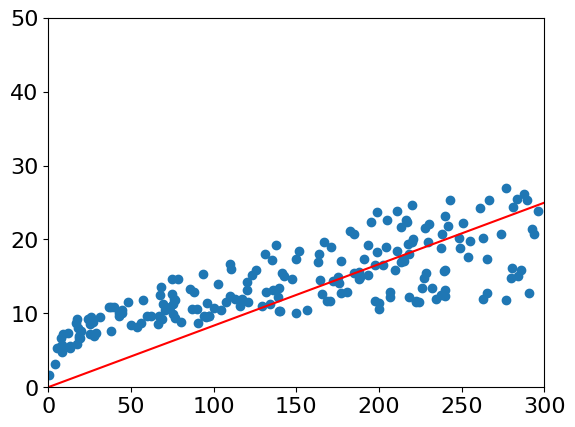

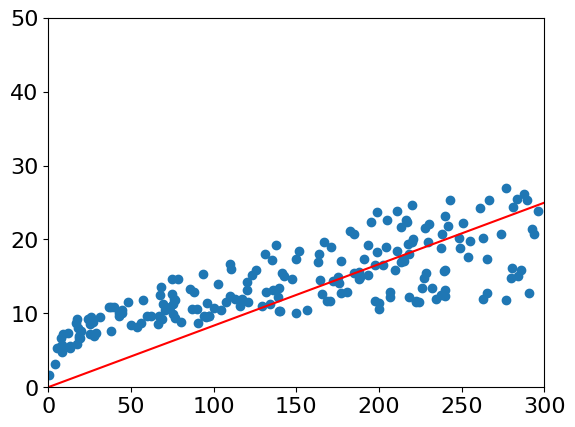

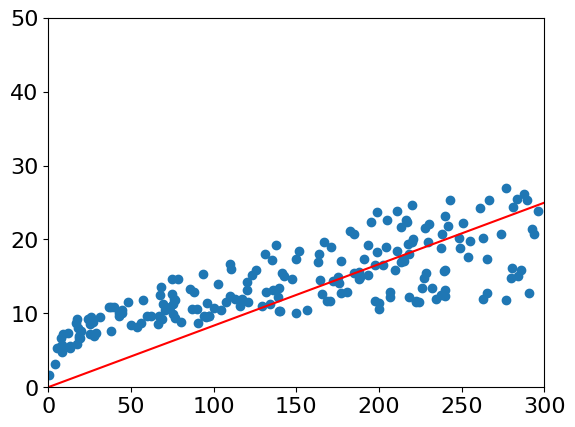

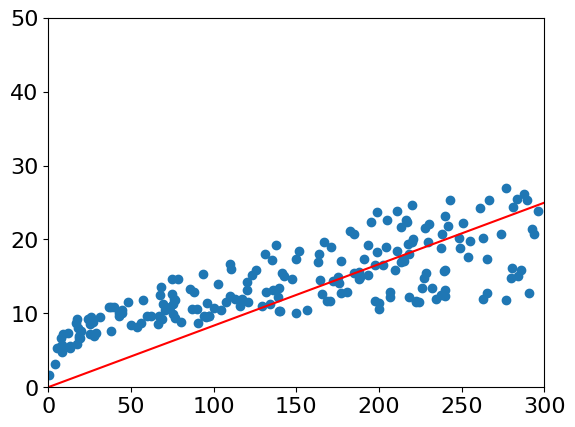

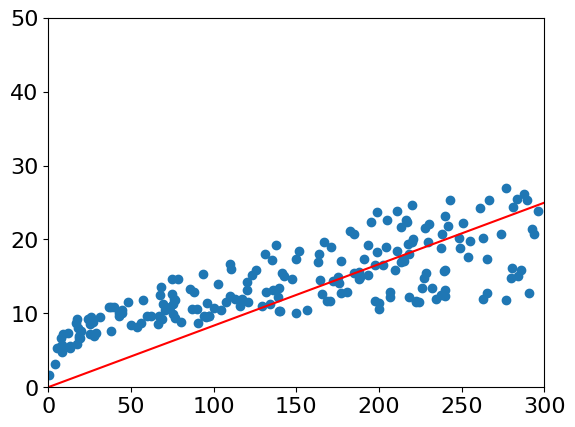

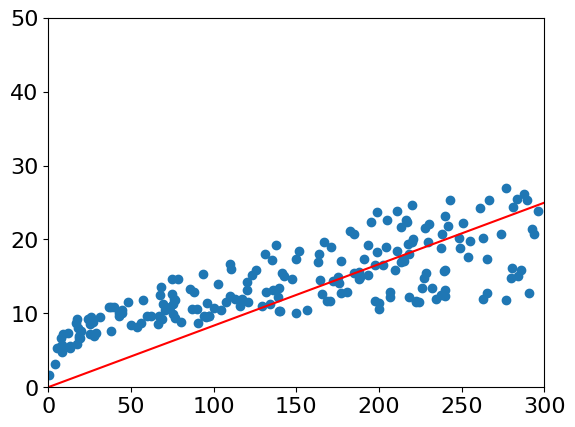

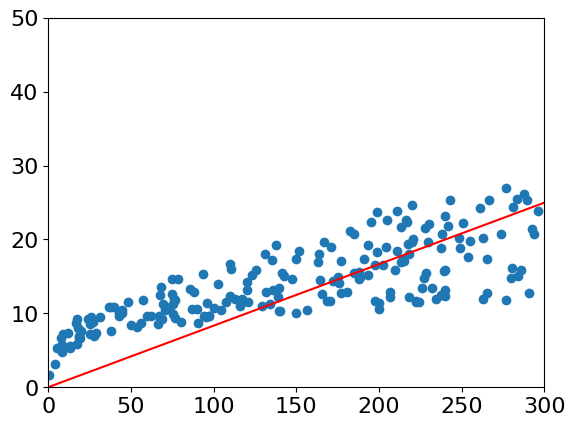

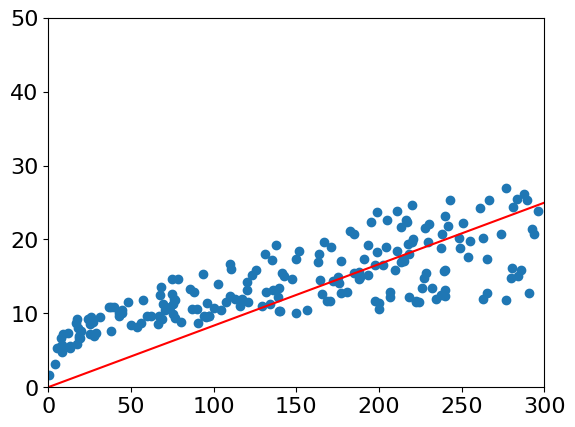

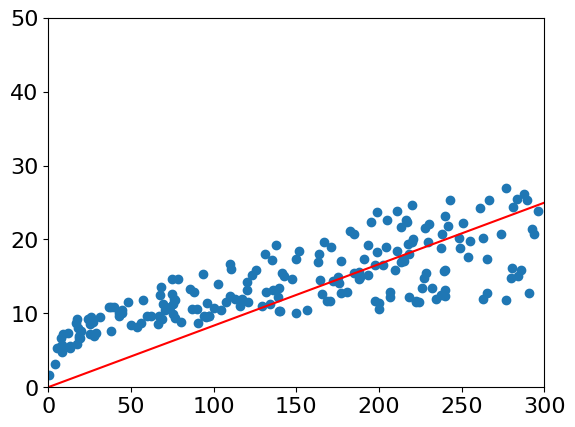

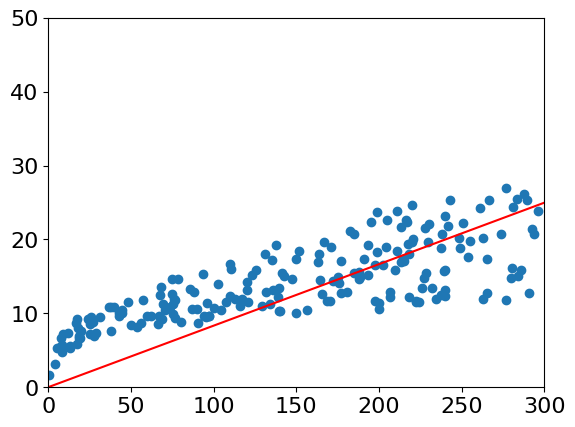

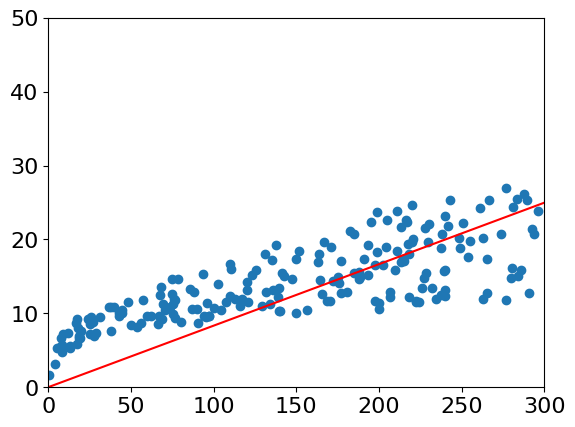

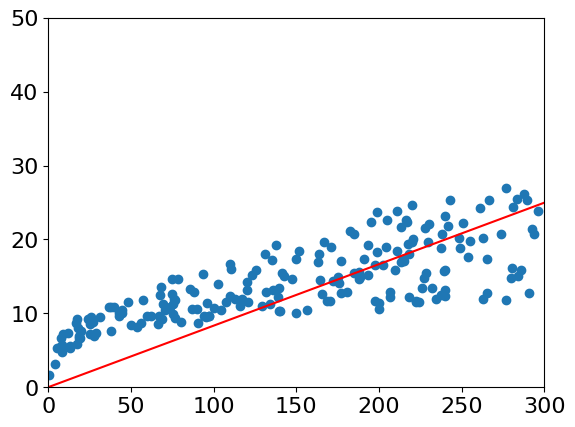

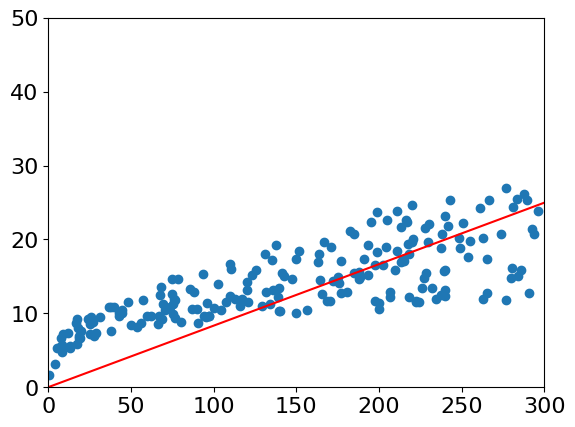

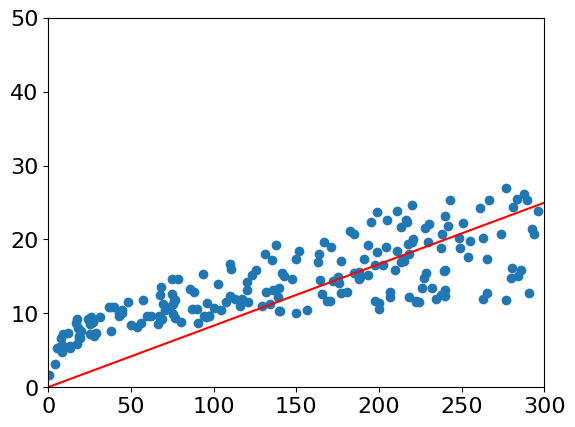

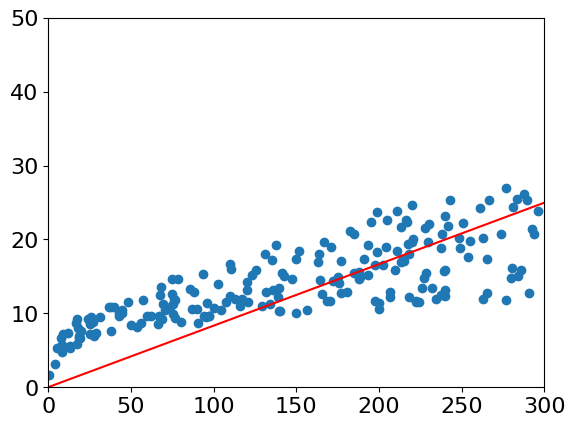

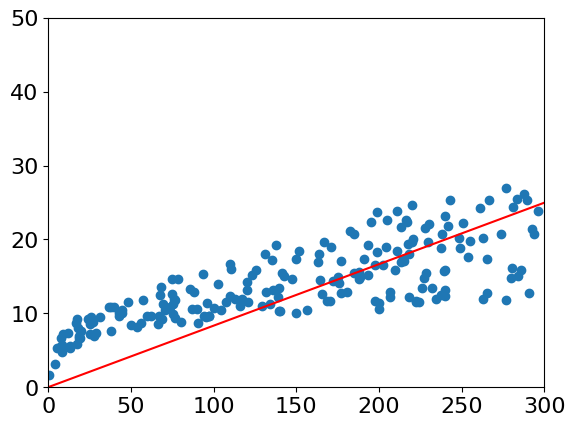

In [21]:
hist_loss = {}
def gradient_descent(x, y, w, b, alpha, epochs):
    """Gradient descent process. 
    """

    counter = 0;
    for e in range(epochs):
        w, b = update(x, y, w, b, alpha)

        # Log the progress
        if (e == 0) or (e < 3000 and e % 200 == 0) or (e % 3000 == 0):
            loss_e = loss(x, y, w, b)
            hist_loss[e] = loss_e
            print("epoch: ", str(e), "loss: "+str(loss_e))
            print("w, b: ", w, b)
            print('---')
            # Plot the update 
            plt.figure(counter)
            axes = plt.gca()
            axes.set_xlim([0,300])
            axes.set_ylim([0,50])
            plt.scatter(x, y)
            X_plot = np.linspace(0,300,300)
            plt.plot(X_plot, X_plot*w + b, 'r-')
            counter += 1
    return w, b 

# Run the Gradient Descent algorithm
w, b = gradient_descent(x, y, w, b, alpha, epochs)
print('End of training!')

### Task 2/ Plot the loss against the epochs. 

Text(0.5, 1.0, 'Loss againts the epochs')

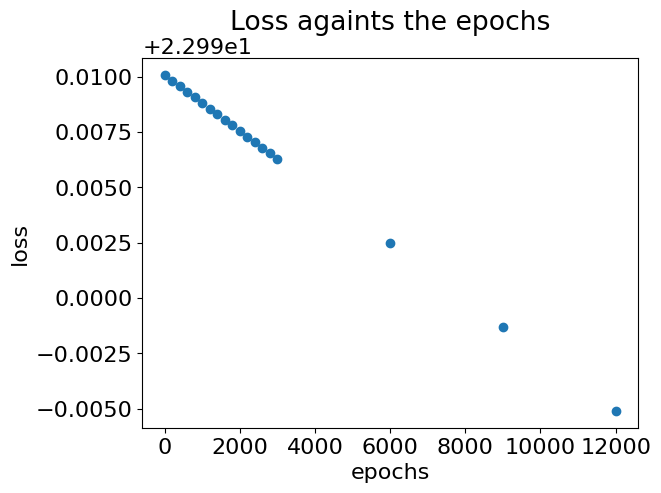

In [32]:
#print(hist_loss)

plt.scatter(hist_loss.keys(), hist_loss.values())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss againts the epochs")


In [35]:
print(hist_loss)

{0: 23.00007769284648, 200: 22.999824669045566, 400: 22.9995716503715, 600: 22.99931863682416, 800: 22.999065628403432, 1000: 22.998812625109263, 1200: 22.998559626941528, 1400: 22.99830663390008, 1600: 22.998053645984886, 1800: 22.99780066319579, 2000: 22.997547685532712, 2200: 22.997294712995526, 2400: 22.99704174558415, 2600: 22.996788783298463, 2800: 22.9965358261384, 3000: 22.996282874103784, 6000: 22.9924892085732, 9000: 22.988696695904288, 12000: 22.98490533574665}


### Task 3/ Store the history of w and b paramseters.  

epoch:  0 loss: 22.98111512775006
w, b:  0.08316646054909048 0.016434899957837496
---
epoch:  200 loss: 22.980862488174093
w, b:  0.08316609957641836 0.016505982032552356
---
epoch:  400 loss: 22.980609853717223
w, b:  0.08316573860740335 0.016577063387120818
---
epoch:  600 loss: 22.98035722437926
w, b:  0.08316537764204537 0.016648144021550192
---
epoch:  800 loss: 22.980104600160168
w, b:  0.0831650166803444 0.016719223935847752
---
epoch:  1000 loss: 22.979851981059806
w, b:  0.0831646557223004 0.016790303130020837
---
epoch:  1200 loss: 22.979599367078073
w, b:  0.08316429476791334 0.01686138160407668
---
epoch:  1400 loss: 22.97934675821493
w, b:  0.08316393381718319 0.016932459358022605
---
epoch:  1600 loss: 22.97909415447017
w, b:  0.08316357287010989 0.01700353639186592
---
epoch:  1800 loss: 22.978841555843772
w, b:  0.08316321192669342 0.017074612705613928
---
epoch:  2000 loss: 22.978588962335575
w, b:  0.08316285098693373 0.017145688299273886
---
epoch:  2200 loss: 22.978

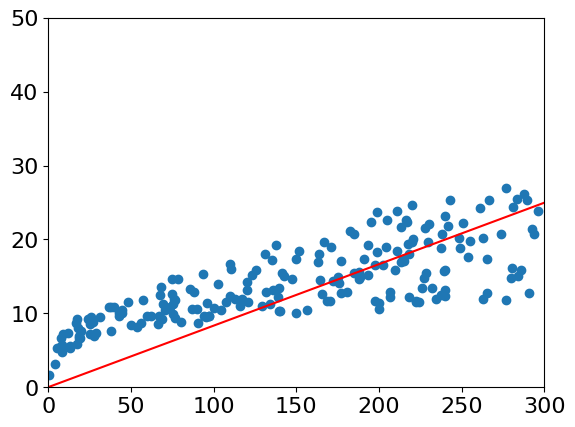

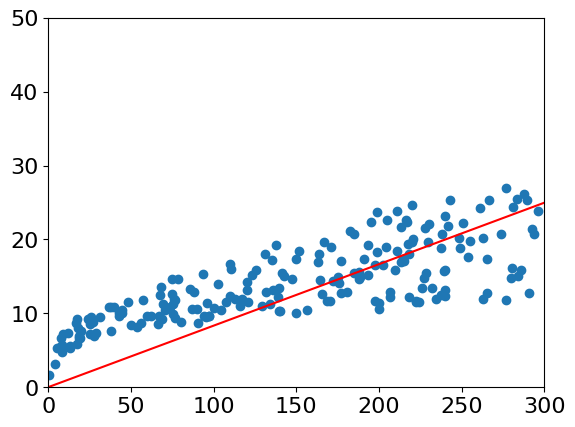

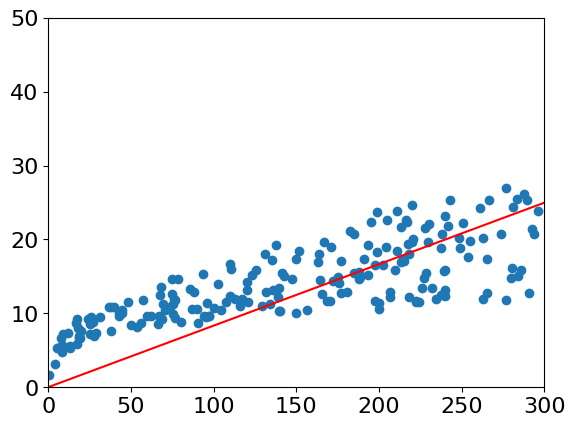

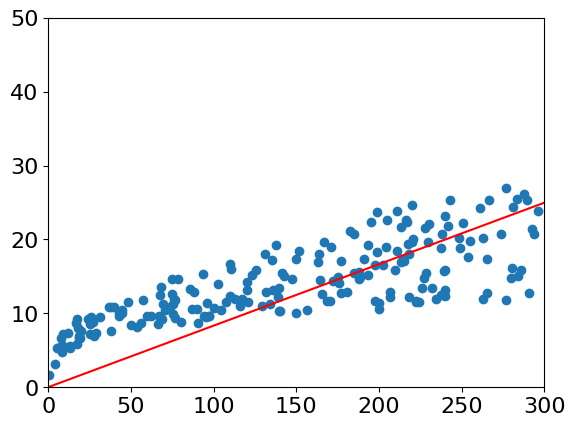

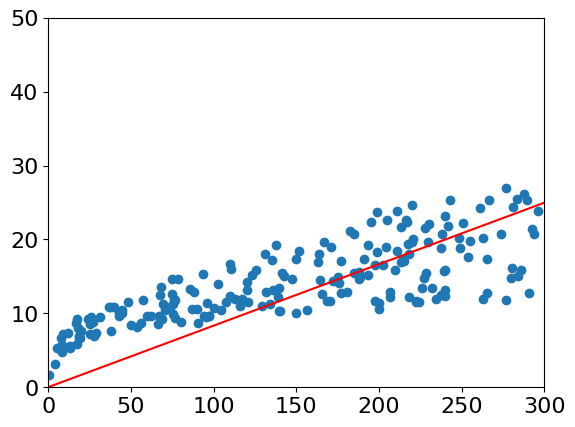

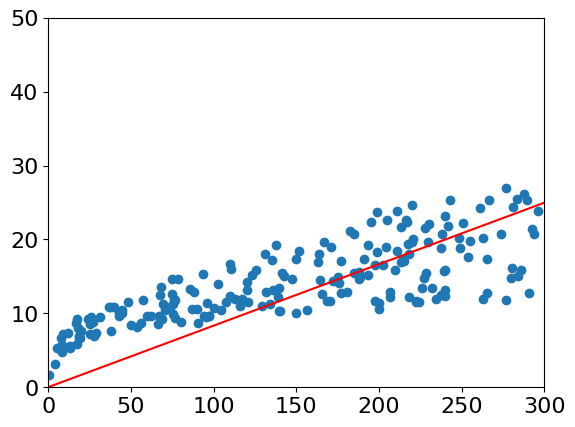

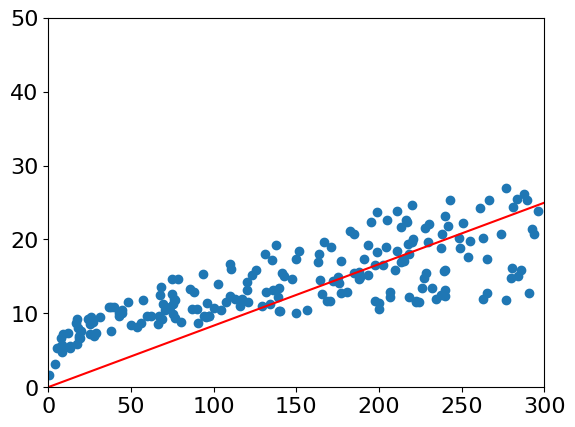

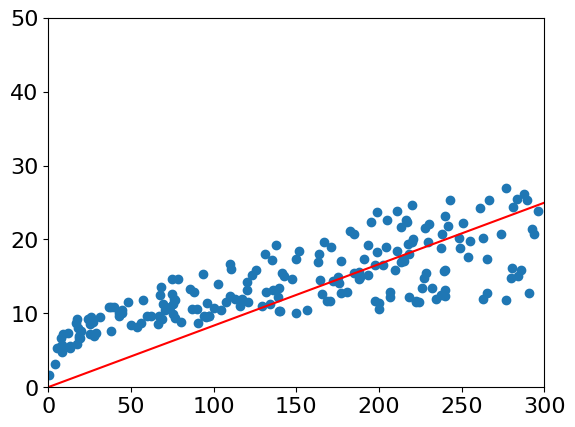

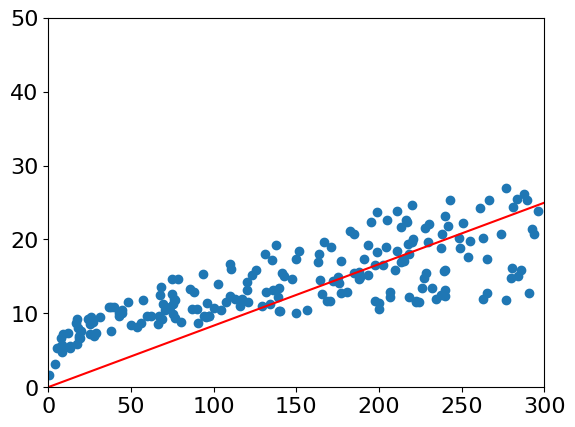

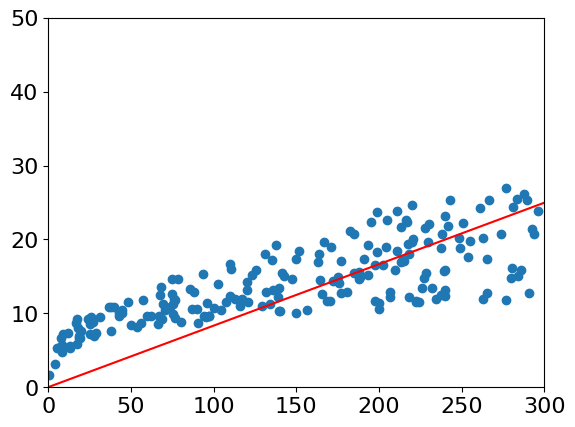

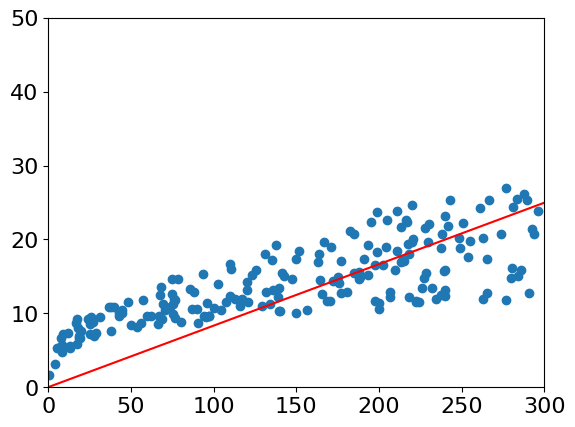

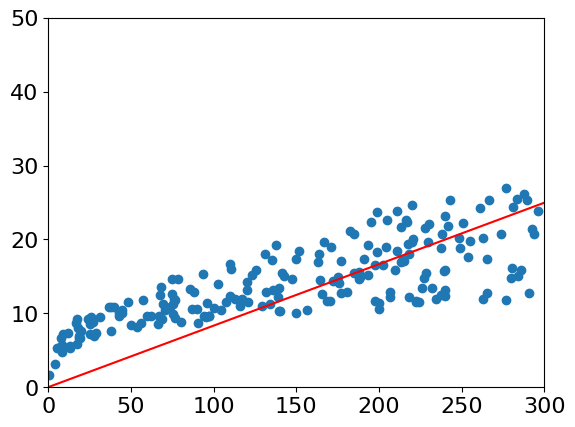

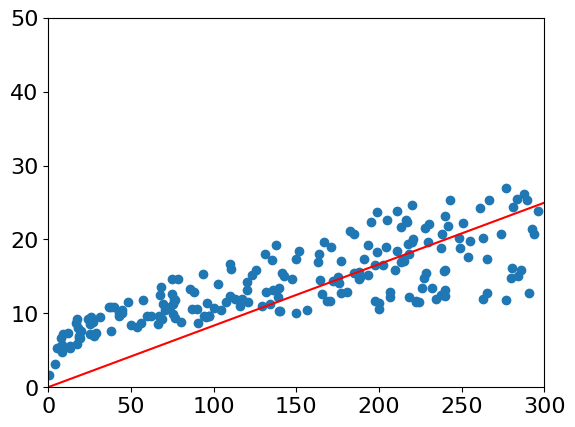

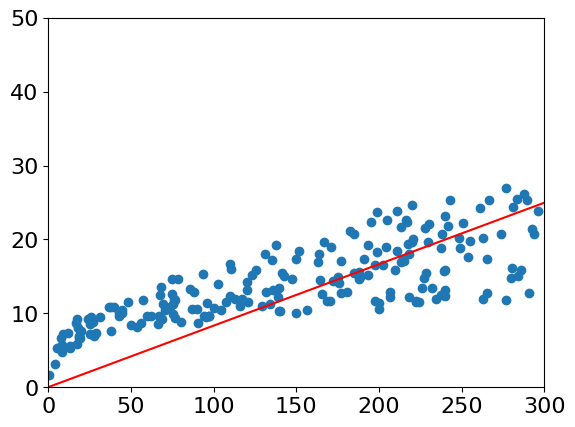

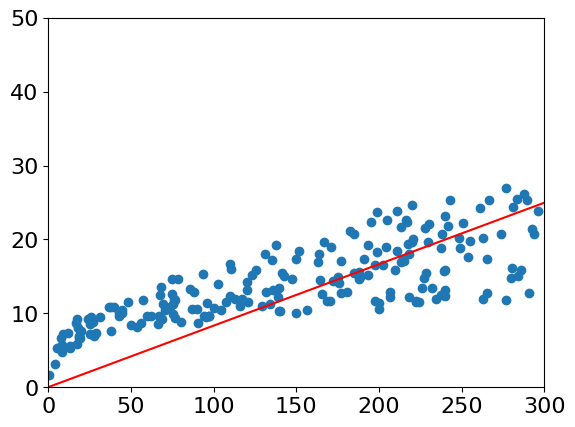

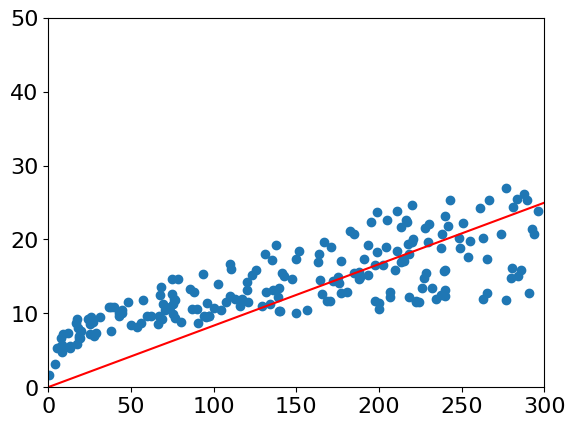

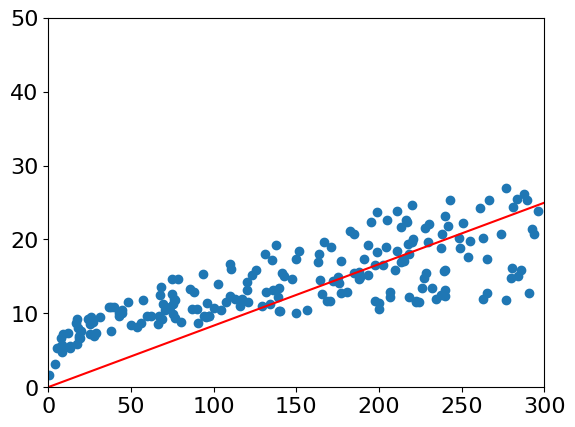

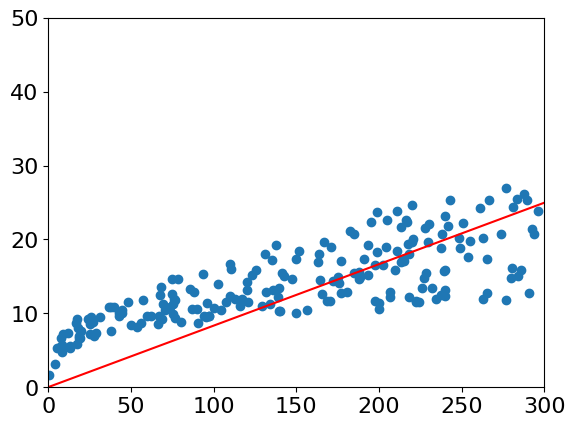

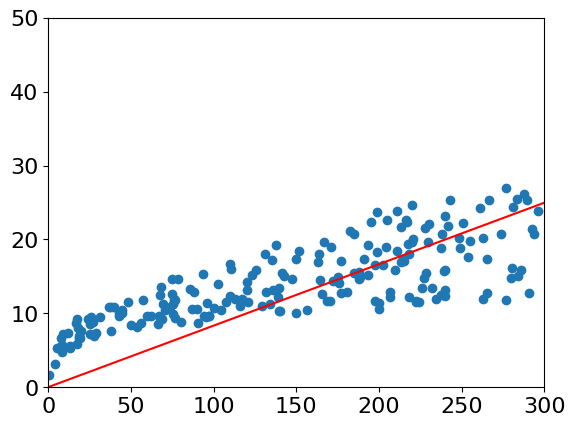

In [26]:
list_e = []
list_w = []
list_b = []

def gradient_descent(x, y, w, b, alpha, epochs):
    """Gradient descent process. 
    """

    counter = 0;
    for e in range(epochs):
        w, b = update(x, y, w, b, alpha)

        # Log the progress
        if (e == 0) or (e < 3000 and e % 200 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print('---')
            # Plot the update 
            plt.figure(counter)
            axes = plt.gca()
            axes.set_xlim([0,300])
            axes.set_ylim([0,50])
            plt.scatter(x, y)
            X_plot = np.linspace(0,300,300)
            plt.plot(X_plot, X_plot*w + b, 'r-')
            counter += 1

            list_e.append(e)
            list_w.append(w)
            list_b.append(b)
    return w, b 

# Run the Gradient Descent algorithm
w, b = gradient_descent(x, y, w, b, alpha, epochs)
print('End of training!')

### Task 4/ Plot w and b against the epochos  

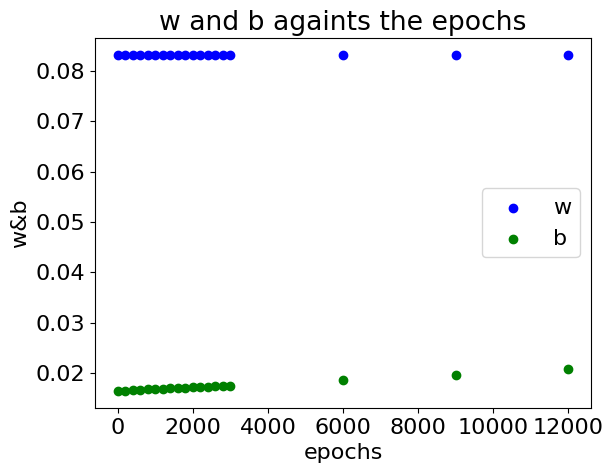

In [34]:
plt.scatter(list_e, list_w, c="b", label="w")
plt.scatter(list_e, list_b, c="g", label="b")
plt.xlabel("epochs")
plt.ylabel("w&b")
plt.title("w and b againts the epochs")
plt.legend(loc="best")